# Lab One: Exploring Table Data

***Ayan Khan, Anika Saiprabhu, Victoria Valdez***

# 1. Business Understanding


Educational policy aims to ensure that all students are able to succeed in their respective academic environments. In order to help their rankings, universities attempt to maximize graduation rates and retention rates while minimizing dropouts.

Towards this end, it becoems important for universities to understand the factors at play that may affect student success and retention in order to best address the needs of students most at risk of dropping out. 


We chose a dataset from the UCI ML repository regarding student success rates. This dataset has 4424 instances and 36 features, including numerical and categorical data.
- Dataset: UCI Machine Learning Repository - Student Dropout and Academic Success 

- *URL: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success*


By understanding the different factors that affect a student's success, schools can pass policy that will best support students most at risk for failing or dropping out. By understanding the factors at play, universities can proactively pass policies aimed at recruitment, retention, and support both before and after admittance. 

This would help both students in their academic journey and universities attempting to raise their rankings.

# 2. Data Understanding

We first imported the data itself from the attached csv. The variable data was downloaded directly from the UCI Machine Learning repository.

### 2.1. Data set

In [1]:
# importing data 
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### 2.2 Data Information and Data Types:

*The data information and data types from the original dataset are as listed above.*

For the most part, it would be best to represent each data attribute the way it's listed, but the 
following attributes would benefit from using a different data type:  
* Course: string instead of int  
* Nationality: string instead of int

For these variables, it would be best to work with them as integers, but they are thought of as booleans:
   * Displaced, Educational special needs, Debtor, Tuition fees up to date, Scholarship holder, International

The following data attributes will not contribute meaninfully to our analysis:
   * Application mode, Application order, Admission grade, Previous qualification (grade)

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset from UCI repo
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
 
# variable information 
df_var = predict_students_dropout_and_academic_success.variables
df_var

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,None,no
6,Previous qualification (grade),Feature,Continuous,None,Grade of previous qualification (between 0 and...,None,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,None,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no


In [3]:
print(df.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

#### Variable Descriptions:

**Marital status:** 

- 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

**Application mode:** 

- 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)

**Application order:**

- Application order (between 0 - first choice; and 9 last choice)


**Course:** 

- 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)

**Daytime/evening attendance:** 

- 1 – daytime 0 - evening

**Previous qualification:**

 - 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)

**Previous qualification (grade):** 

- Grade of previous qualification (between 0 and 200)

**Nationality:** 

- 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian

**Mother's qualification:**

 - 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)

**Father's qualification:**

 - 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)

**Mother's occupation:**

 - 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants

**Father's occupation:**

 - 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants

**Admission grade:** Admission grade (between 0 and 200)

**Displaced:** 1 – yes 0 – no

**Educational special needs:** 1 – yes 0 – no

**Debtor:** 1 – yes 0 – no

**Tuition fees up to date:** 1 – yes 0 – no

**Gender:** 1 – male 0 – female

**Scholarship holder:** 1 – yes 0 – no

**Age at enrollment:** Age of studend at enrollment

**International:** 1 – yes 0 – no

**Curricular units 1st sem (credited):** Number of curricular units credited in the 1st semester

**Curricular units 1st sem (enrolled):** Number of curricular units enrolled in the 1st semester

**Curricular units 1st sem (evaluations):** Number of evaluations to curricular units in the 1st semester

**Curricular units 1st sem (approved):** Number of curricular units approved in the 1st semester	

**Curricular units 1st sem (grade):** Grade average in the 1st semester (between 0 and 20)

**Curricular units 1st sem (without evaluations):** Number of curricular units without evalutions in the 1st semester

**Curricular units 2nd sem (credited):** Number of curricular units credited in the 2nd semester	

**Curricular units 2nd sem (enrolled):** Number of curricular units enrolled in the 2nd semester	

**Curricular units 2nd sem (evaluations):** Number of evaluations to curricular units in the 2nd semester

**Curricular units 2nd sem (approved):** Number of curricular units approved in the 2nd semester	

**Curricular units 2nd sem (grade):** Grade average in the 2nd semester (between 0 and 20)	

**Curricular units 2nd sem (without evaluations):** Number of curricular units without evalutions in the 1st semester

**Unemployment rate:** Unemployment rate (%)

**Inflation rate:** Inflation rate (%)

**GDP:** GDP

**Target:** Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the courseing

### 2.3. Data quality

#### 2.3.1 Data description

In [4]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


- There are no missing values in this dataset, as indicated by the dataset information page from the UCI website. This is also confirmed by the occurence of 4424 entries in each feature.

In [ ]:
# Check duplicates
idx = df.duplicated()
len(df[idx])

- There are no duplicate data values in this dataset. In the case that there were duplicate values, we would delete the duplicates. 

- This dataset has also been processed to remove outliers.  If there were outliers, we would drop all rows with entries that are IQR * 1.5 above Q3 and IQR * 1.5 below Q1 for that attribute.

#### 2.3.2 Cleaning the data

1. Courses

    The first thing we did to lean the data is to replace all course numbers in the data with the corresponding course names. Since the numbers aren't hierarchical, there's little use in keeping the numbers in the dataset when processing. Names make this data more easy to understand, especially when analyzing the data categorically.

In [6]:
# Replaces course numbers with corresponding names

df["Course"].replace(to_replace = [33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991],
                    value = ["Biofuel production", "Animation and multimedia", "Social service (evening)", "Agronomy", "Communication design", "Veterinary nursing", 
                            "Informatics engineering", "Equinculture", "Management", "Social service", "Tourism", "Nursing", "Oral hygiene", "Advertising and marketing management",
                            "Journalism and communication", "Basic Education", "Management (evening)"], inplace = True)

df["Course"]

0           Animation and multimedia
1                            Tourism
2               Communication design
3       Journalism and communication
4           Social service (evening)
                    ...             
4419    Journalism and communication
4420    Journalism and communication
4421                         Nursing
4422                      Management
4423    Journalism and communication
Name: Course, Length: 4424, dtype: object

2. Nationality

    There was a mispelling of "Nationality" in the column name; we fixed this. 
    
    Similar to the course numbers, we replaced the numbers for each nationality with the corresponding nationality name. Since these numbers aren't hierarchical this improved clarity. 

In [7]:
# Correct the mispelling of "Nationality"
df.rename(columns = {"Nacionality":"Nationality"}, inplace = True)

# Replacing all nationality numers with corresponding names
df["Nationality"].replace(to_replace = [1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109],
                         value = ["Portuguese", "German", "Spanish", "Italian", "Dutch", "English", "Lithuanian", "Angolan", "Cape Verdean", 
                                  "Guinean", "Mozambican", "Santomean", "Turkish", "Brazillian", "Romanian", "Rep. of Moldova", "Mexican", "Ukranian", 
                                  "Russian", "Cuban", "Colombian"], inplace = True)
df["Nationality"]

0         Portuguese
1         Portuguese
2         Portuguese
3         Portuguese
4         Portuguese
            ...     
4419      Portuguese
4420         Russian
4421      Portuguese
4422      Portuguese
4423    Cape Verdean
Name: Nationality, Length: 4424, dtype: object

3. Marital Status

    The casing for marital status was inconsistent with that of other columns; we fixed this.

    Similar to the previous two variables, we replaced numbers with their corresponding categories.

    

In [8]:
# Make casing of variable name consistent with others
df.rename(columns = {"Marital Status":"Marital status"}, inplace = True)

# Replacing all marital status numbers with marital status names 
df["Marital status"].replace(to_replace = [1, 2, 3, 4, 5, 6],
                         value = ["single", "married", "widower", "divorced", "facto union", "legally separated"], inplace = True)

In [9]:
# Eliminated all rows with students "Enrolled" in order to focus on outcomes ("Graduates" and "Dropouts")

df = df.drop(df[df["Target"] == "Enrolled"].index)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,17,5,Animation and multimedia,1,1,122.0,Portuguese,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,15,1,Tourism,1,1,160.0,Portuguese,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,Communication design,1,1,122.0,Portuguese,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,17,2,Journalism and communication,1,1,122.0,Portuguese,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,39,1,Social service (evening),0,1,100.0,Portuguese,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1,6,Journalism and communication,1,1,125.0,Portuguese,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1,2,Journalism and communication,1,1,120.0,Russian,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1,1,Nursing,1,1,154.0,Portuguese,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1,1,Management,1,1,180.0,Portuguese,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


4. Extrenous Variables

    The following variables won't be used in our analysis; as such we removed them from the dataframe:

    - Application mode, Application order, Previous qualification (grade), Admission grade


In [10]:
# Eliminate attributes that are not necessary

# The following data attributes will not contribute meaninfully to our analysis:
#    Application mode, Application order, Previous qualification (grade), Admission grade

df = df.drop("Application mode", axis = 1)
df = df.drop("Application order", axis = 1)
df = df.drop("Previous qualification (grade)", axis = 1)
df = df.drop("Admission grade", axis = 1)

df

,Marital status,Course,Daytime/evening attendance\t,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,Animation and multimedia,1,1,Portuguese,19,12,5,9,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,Tourism,1,1,Portuguese,1,3,3,3,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,Communication design,1,1,Portuguese,37,37,9,9,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,Journalism and communication,1,1,Portuguese,38,37,5,3,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Social service (evening),0,1,Portuguese,37,38,9,9,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,Journalism and communication,1,1,Portuguese,1,1,5,4,0,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,Journalism and communication,1,1,Russian,1,1,9,9,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,Nursing,1,1,Portuguese,37,37,9,9,1,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,Management,1,1,Portuguese,37,37,7,4,1,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


5. Numerical Data

    Numerical data summary of all variables with numerical values (categorical variables excluded)

In [11]:
# Data summary: 18 attributes displayed

summary1 = df.iloc[0:, 0:20]
summary1.describe()

,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations)
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.00000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,0.887603,4.532231,19.986226,22.571625,10.138567,10.28292,0.549036,0.011019,0.113774,0.866116,0.344077,0.266942,23.461157,0.023691,0.754270,6.337466,8.071074
std,0.315897,10.024134,15.585278,15.275453,23.315697,22.40269,0.497658,0.104407,0.317580,0.340575,0.475132,0.442423,7.827994,0.152107,2.477277,2.570773,4.286632
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,4.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000
50%,1.000000,1.000000,19.000000,19.000000,5.000000,7.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000
75%,1.000000,1.000000,37.000000,37.000000,9.000000,9.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,0.000000,0.000000,7.000000,10.000000
max,1.000000,43.000000,44.000000,44.000000,194.000000,195.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000


In [12]:
# Data summary: 16 attributes displayed

summary2 = df.iloc[0:, 20:38]
summary2.describe()

,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,4.791460,10.534860,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,3.237845,5.057694,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,5.000000,12.341429,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,6.000000,13.500000,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Data summary needed to be expressed this way because all the attributes wouldn't fit in one display ("..." in the middle hid values)

In [13]:
# calculate number of graduates and dropouts
grad = 0
drop = 0
none = 0

for x in df["Target"]:
    if x == "Graduate":
        grad += 1
    elif x == "Dropout":
        drop += 1
    else:
        none += 1
        
print("Number of graduates: ", grad)
print("Number of dropouts: ", drop)
print("Other: ", none, " (checking for extraneous data, there is none)")
print("Total number of students: ", (grad + drop + none), "(total matches number of rows)")


Number of graduates:  2209
Number of dropouts:  1421
Other:  0  (checking for extraneous data, there is none)
Total number of students:  3630 (total matches number of rows)


# 3. Data Visualization

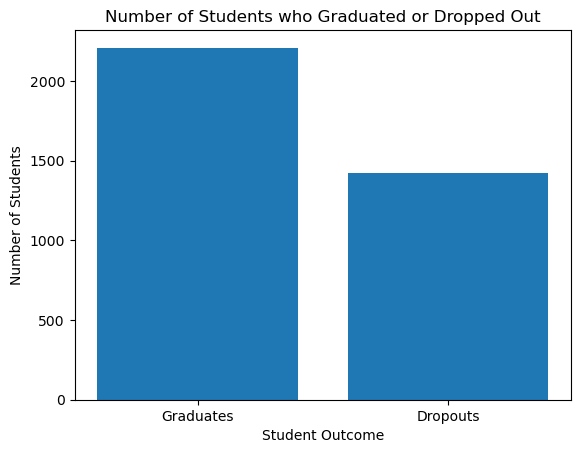

In [14]:
df_target_labs = ["Graduates", "Dropouts"]
df_target_vals = [grad, drop]

plt.bar(df_target_labs, df_target_vals)
plt.xlabel("Student Outcome")
plt.ylabel("Number of Students")
plt.title("Number of Students who Graduated or Dropped Out")
plt.show()

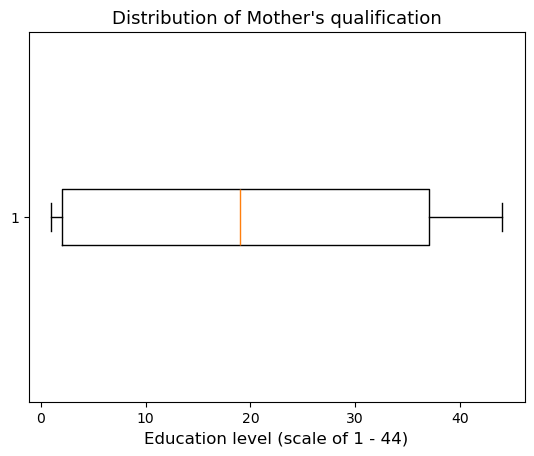

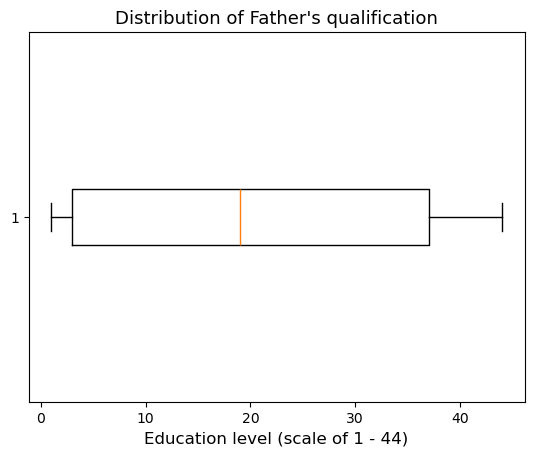

In [15]:
# Histogram: qualifications

# fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 15), sharey=True)

plt.boxplot(df["Mother's qualification"], vert = False)
plt.title("Distribution of Mother's qualification", fontsize = 13)
plt.xlabel("Education level (scale of 1 - 44)", fontsize = 12)
plt.show()

plt.boxplot(df["Father's qualification"], vert = False)
plt.title("Distribution of Father's qualification", fontsize = 13)
plt.xlabel("Education level (scale of 1 - 44)", fontsize = 12)
plt.show()


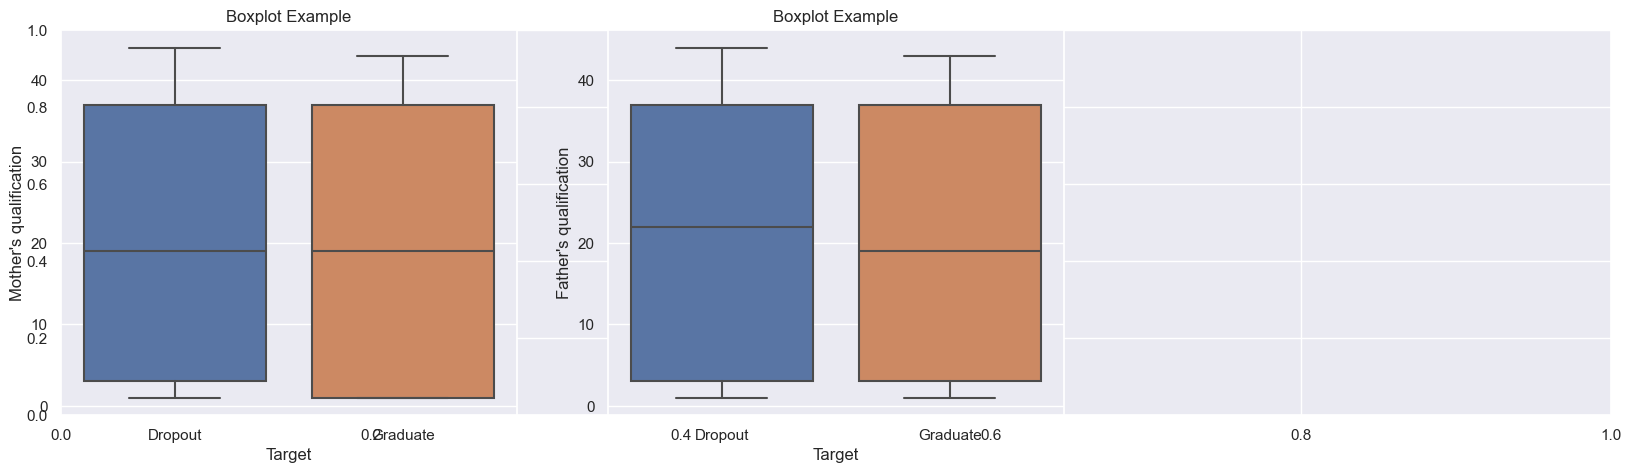

In [54]:
plt.subplots(figsize=(20, 5))

plt.subplot(1,3,1)
sb.boxplot(x = df["Target"], y = df["Mother's qualification"], data = df)
plt.title('Boxplot Example')

plt.subplot(1,3,2)
sb.boxplot(x = df["Target"], y = df["Father's qualification"], data = df)
plt.title('Boxplot Example')

plt.show()

/var/folders/xh/5nylzkmn0d93k6ffdc164jw80000gn/T/ipykernel_38018/2860274070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Target"].replace(to_replace = ["Graduate", "Dropout"],


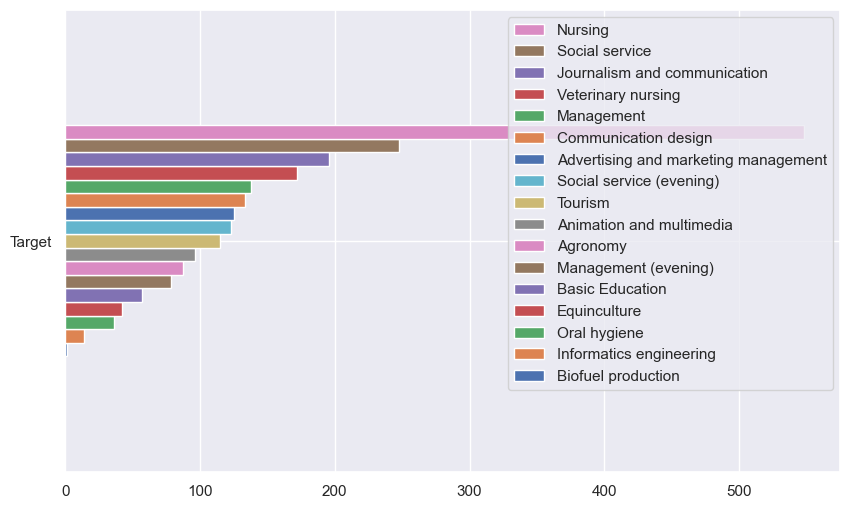

In [90]:
df_subset = df[["Course", "Target"]]

# replace graduate and dropout  by 1 and 0
df_subset["Target"].replace(to_replace = ["Graduate", "Dropout"],
                         value = [1, 0], inplace = True)

# group by course and sum the target value
df_grouped = df_subset.groupby("Course").sum()
df_grouped = df_grouped.sort_values("Target", ascending=True).T



df_grouped.plot(kind = 'barh', figsize=(10, 6))

# Orders the legend:
handles, labels = plt.gca().get_legend_handles_labels() 

# specify order 
order = range(17)
order = order[::-1]
  
# pass handle & labels lists along with order as below 
plt.legend([handles[i] for i in order], [labels[i] for i in order]) 

plt.show()



# plt.bar(df_grouped.apply(np.unique), df_grouped.sum())

In [94]:
print(df_grouped.sum().sort_values(ascending=False))

Course
Nursing                                 548
Social service                          248
Journalism and communication            196
Veterinary nursing                      172
Management                              138
Communication design                    133
Advertising and marketing management    125
Social service (evening)                123
Tourism                                 115
Animation and multimedia                 96
Agronomy                                 87
Management (evening)                     78
Basic Education                          57
Equinculture                             42
Oral hygiene                             36
Informatics engineering                  14
Biofuel production                        1
dtype: int64


In [100]:
single = 0
married = 0
widower = 0
divorced = 0
facto_union = 0
legally_separated = 0
none = 0

for x in df["Marital status"]:
    if x == "single":
        single += 1
    elif x == "married":
        married += 1
    elif x == "widower":
        widower += 1
    elif x == "divorced":
        divorced += 1
    elif x == "facto union":
        facto_union += 1
    elif x == "legally separated":
        legally_separated += 1
    else:
        none += 1

# multi-line string
temp = f"""
single: {single}
married: {married}
divorced: {divorced}
facto_union: {facto_union}
legally_separated: {legally_separated}
widower: {widower}
none: {none}
"""
# prints results
print(temp)



single: 3199
married: 327
divorced: 75
facto_union: 22
legally_separated: 5
widower: 2
none: 0



<BarContainer object of 2 artists>

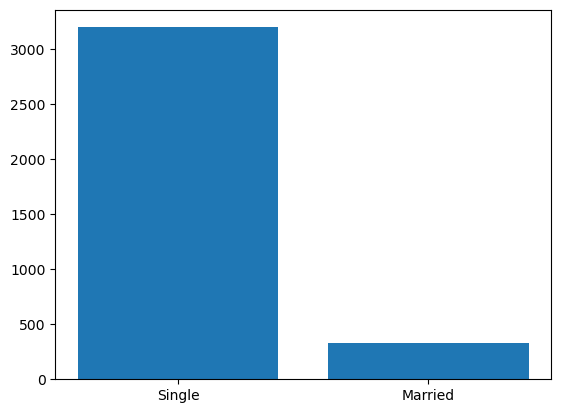

In [20]:
married_label = ["Single", "Married"]
married_count = [single, married]

plt.bar(married_label, married_count)

<BarContainer object of 2 artists>

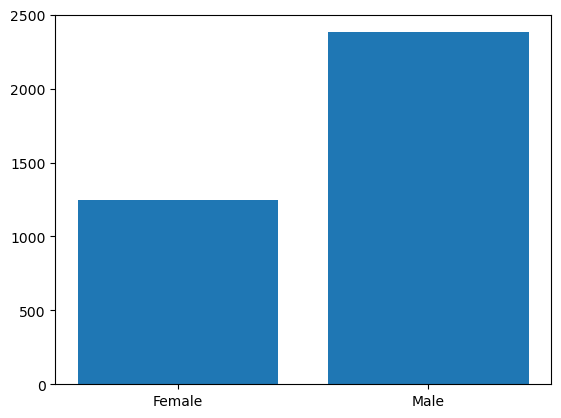

In [21]:
female = 0
male = 0
none = 0

for x in df["Gender"]:
    if x == 0:
        male += 1
    elif x == 1:
        female += 1
    else:
        none += 1

gender_label = ["Female", "Male"]
gender_count = [female, male]

plt.bar(gender_label, gender_count)

Target                 Dropout  Graduate
Marital status Gender                   
married        0            89        96
               1            90        52
single         0           591      1528
               1           593       487


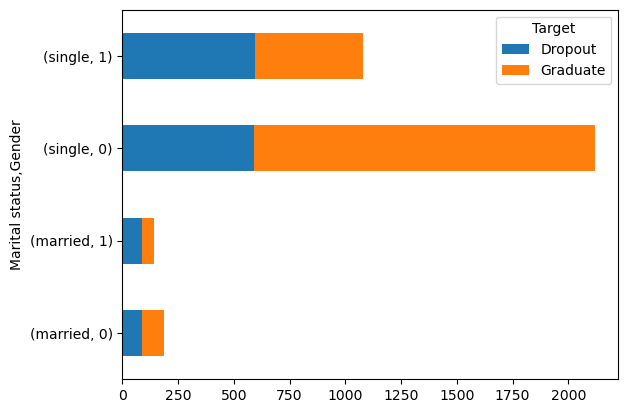

In [22]:
marital_gender = df
marital_gender = marital_gender.drop(df[df["Marital status"] == "divorced"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "facto union"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "legally separated"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "widower"].index)


marital_gender_plot = pd.crosstab([marital_gender["Marital status"],
                        marital_gender["Gender"]], # categories to cross tabulate
                       marital_gender["Target"]) # how to group
print(marital_gender_plot)

marital_gender_plot.plot(kind='barh', stacked=True)
plt.show()

Target                 Dropout  Graduate
Marital status Gender                   
married        0            89        96
               1            90        52


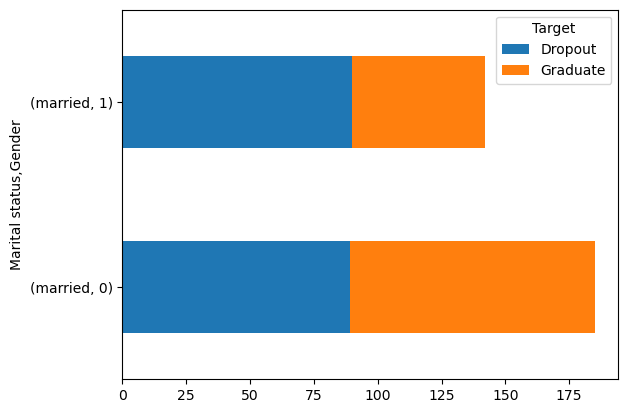

In [23]:
marital_gender = df
marital_gender = marital_gender.drop(df[df["Marital status"] == "divorced"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "facto union"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "legally separated"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "widower"].index)
marital_gender = marital_gender.drop(df[df["Marital status"] == "single"].index)


marital_gender_plot = pd.crosstab([marital_gender["Marital status"],
                        marital_gender["Gender"]], # categories to cross tabulate
                       marital_gender["Target"]) # how to group
print(marital_gender_plot)

marital_gender_plot.plot(kind='barh', stacked=True)
plt.show()

### Heatmap

/Users/ayan/anaconda3/envs/CS7324-ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


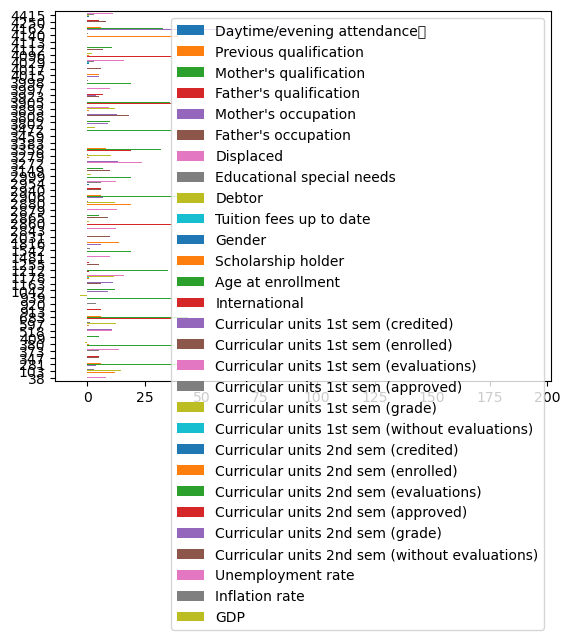

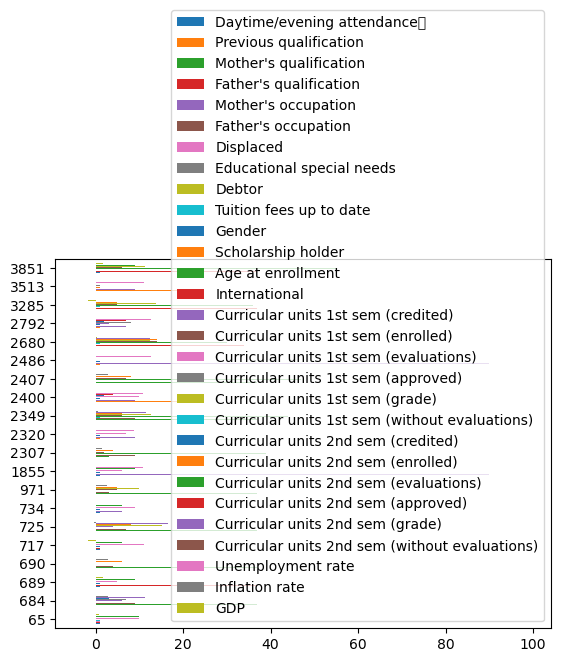

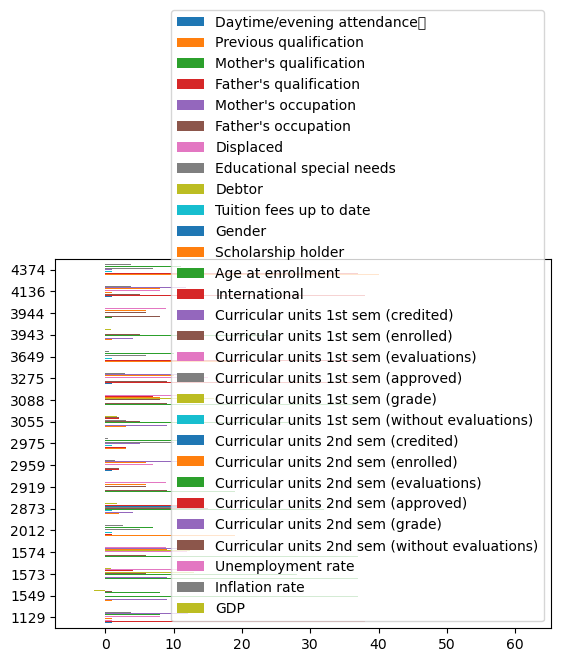

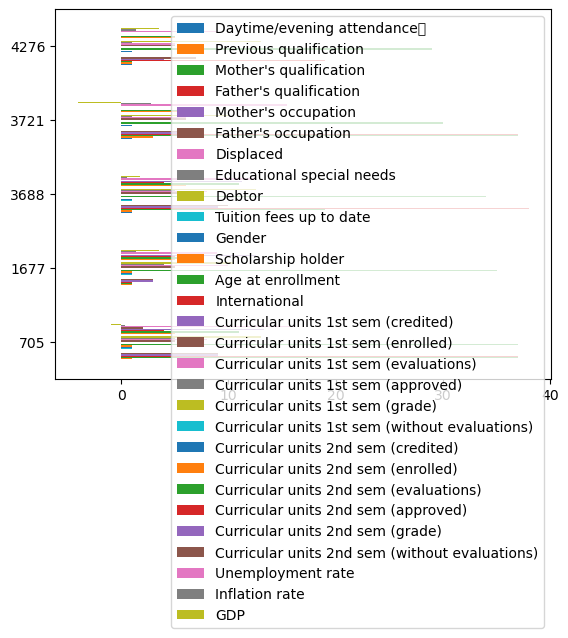

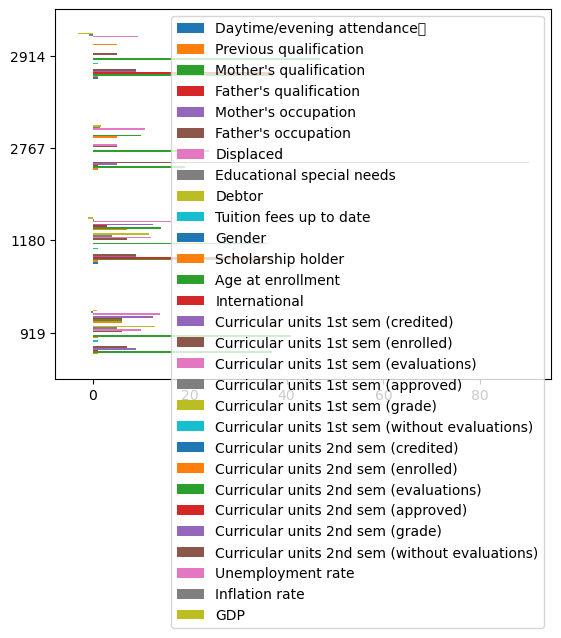

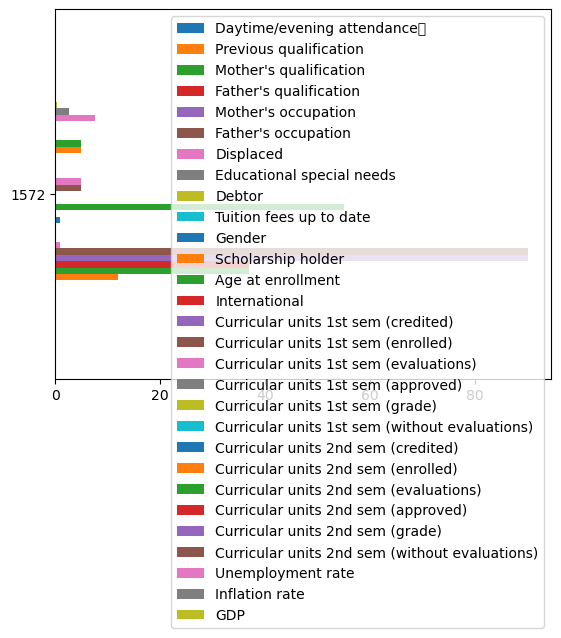

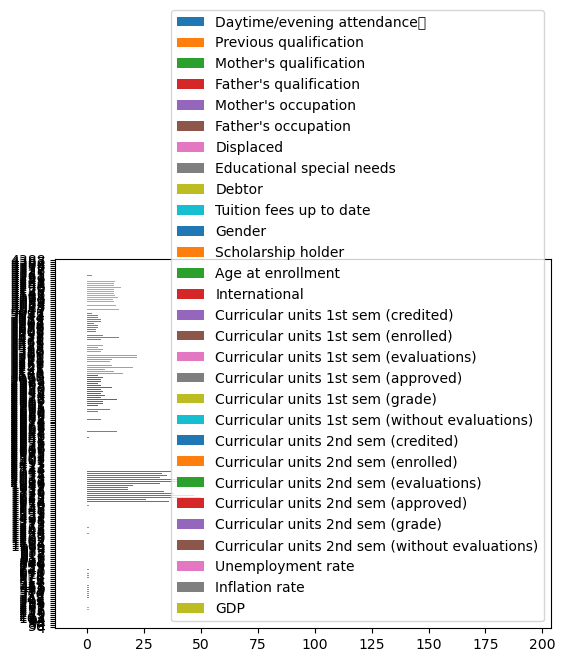

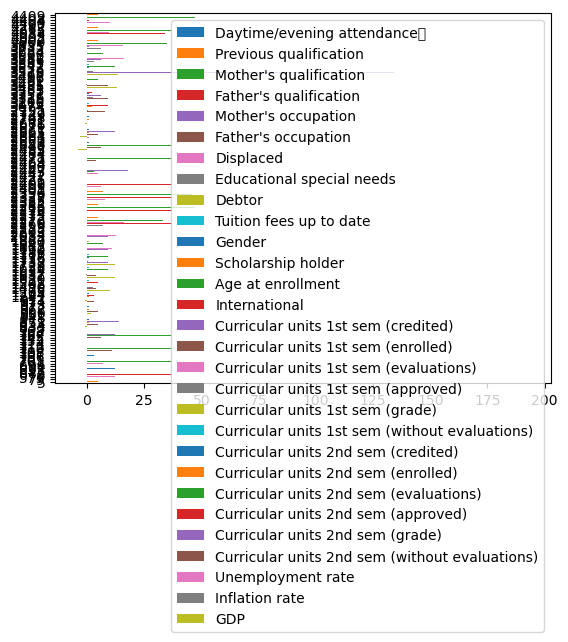

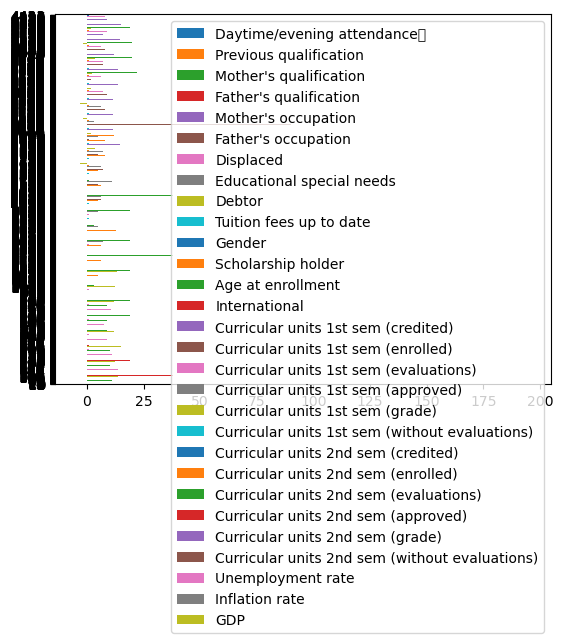

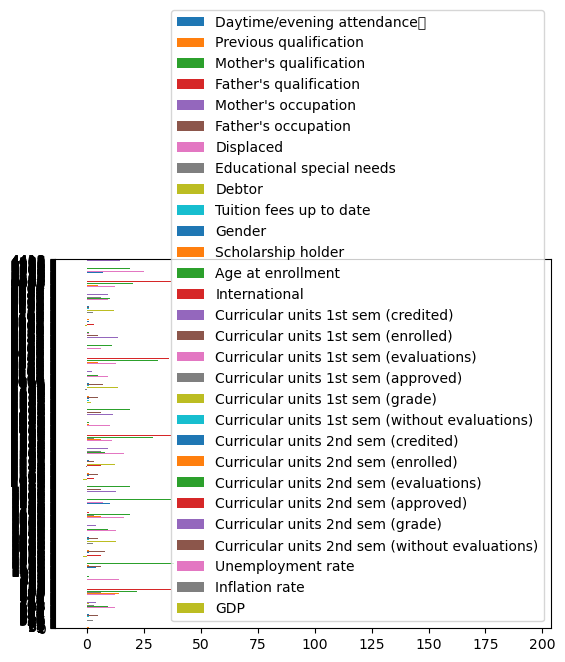

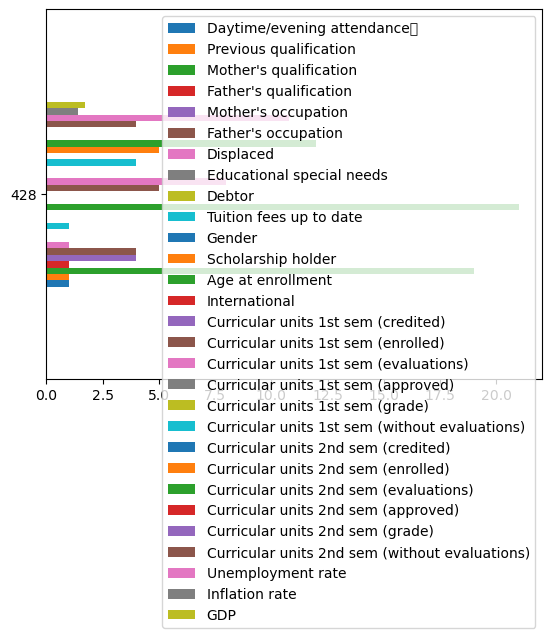

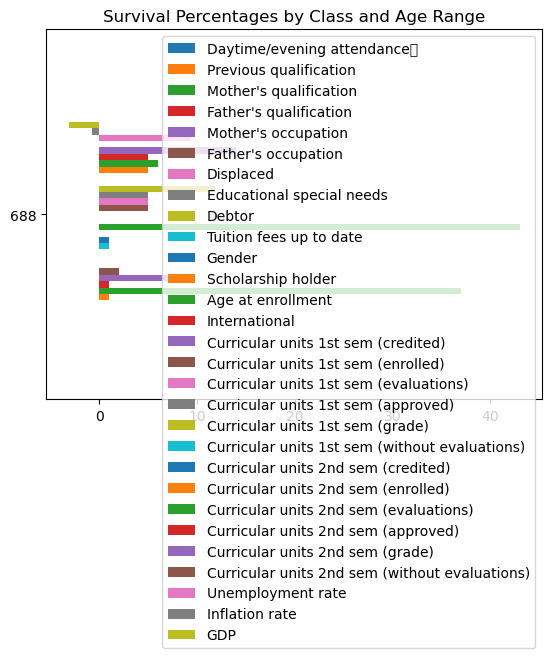

In [24]:
# first group the data
df_marital = df.groupby(by=["Marital status", "Gender"])

# tabulate survival rates of each group
# survival_rate = df_marital.Survived.sum() / df_grouped.Survived.count()

# show in a bar chart using builtin pandas API
ax = df_marital.plot(kind='barh')
plt.title('Survival Percentages by Class and Age Range')
plt.show()

<Axes: >

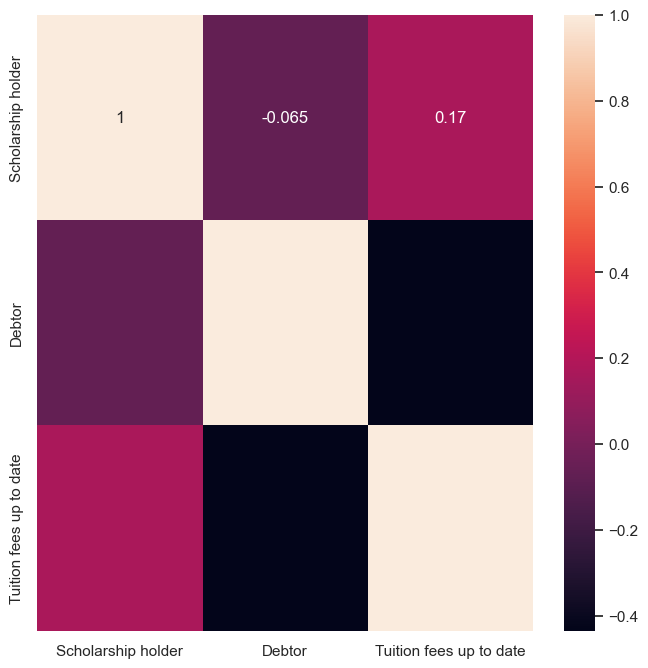

In [25]:
# the correlation plot is Feature based becasue we get
# a place in the plot for each feature
# in this plot we are asking, what features are most correlated? 

df_heatmap = df[["Scholarship holder", "Debtor", "Tuition fees up to date"]]

cmap = sb.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(8, 8))
sb.heatmap(df_heatmap.corr(), cmap=cmap, annot=True)

# f.tight_layout()

## Nationality

In [26]:
#changing target to be numerical
#Doing this to make a correlation matrix
df["Target"].replace(to_replace = ['Dropout', 'Graduate'], value = [0, 1], inplace = True)
df["Target"]

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64

The correlation matrix shows the correlation between the Target variable (graduate or dropout) and GDP, unemployment rate, and inflation rate.

<Axes: >

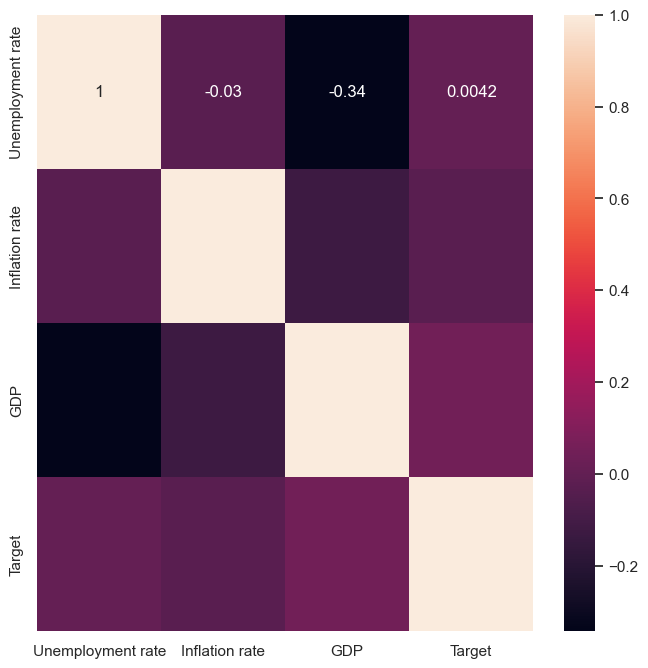

In [27]:

# plot the correlation matrix 
vars_to_use = ['Unemployment rate', 'Inflation rate', 'GDP', "Target"] # pick vars
cmap = sb.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(8, 8))
sb.heatmap(df[vars_to_use].corr(), cmap=cmap, annot=True)


In [28]:
#replacing the 0, 1 values of target with categorical labels (Dropout or Graduate)
df["Target"].replace(to_replace = [0, 1], value = ['Dropout', 'Graduate'], inplace = True)

The following bar plot shows the number of students of each nationality included in the dataset. This is so we can get a better grasp of the distribution. As shown by the graph, the data includes mostly student who are Portuguese.

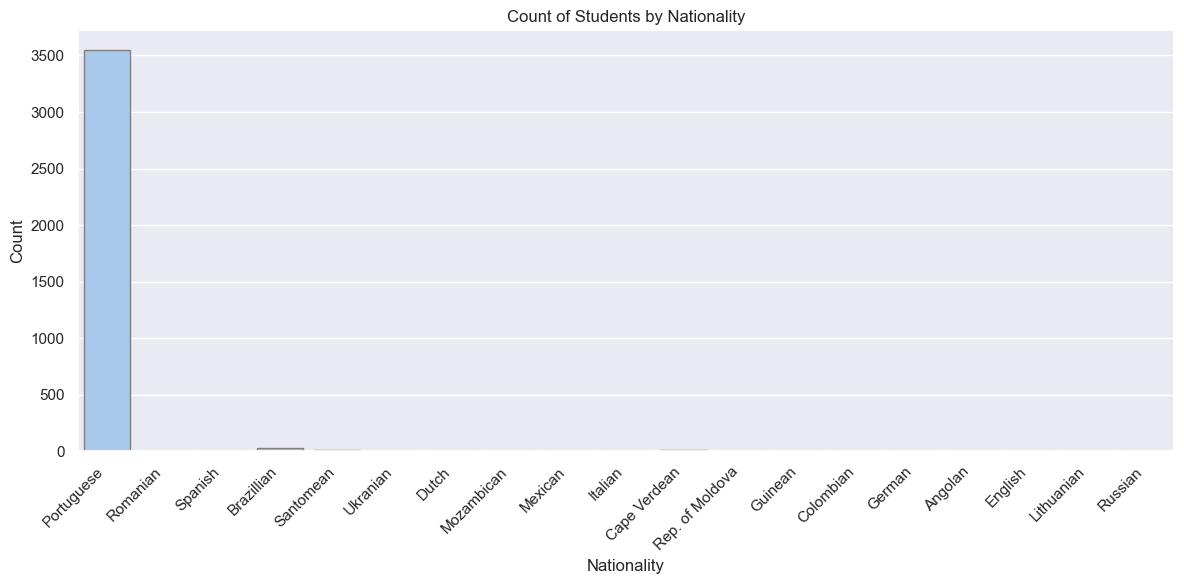

In [29]:

#create the bar plot
plt.figure(figsize=(12, 6))
sb.countplot(x='Nationality', data=df, palette='pastel', edgecolor='gray', saturation=0.8, linewidth=1)
plt.title('Count of Students by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')

#rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

-since data mostly includes Portuguese students, here is a bar chart of graduate vs dropout count for portuguese students

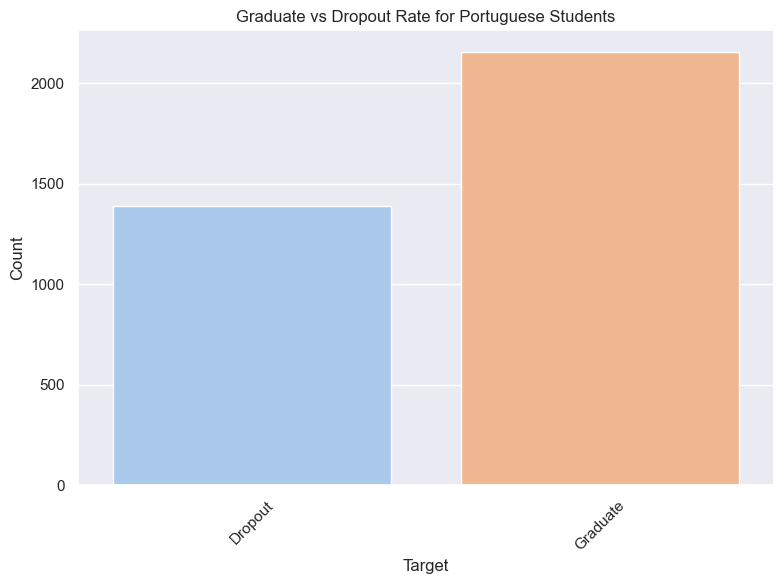

In [30]:
#filter the dataframe to include only Portuguese students
portuguese_df = df[df['Nationality'] == 'Portuguese']

#create the plot
plt.figure(figsize=(8, 6))
sb.countplot(x='Target', data=portuguese_df, palette='pastel')
plt.title('Graduate vs Dropout Rate for Portuguese Students')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-normalized data by grad vs dropout rate and count of students for each nationality 
-to get sense of the distribution by nationality

<Figure size 1200x600 with 0 Axes>

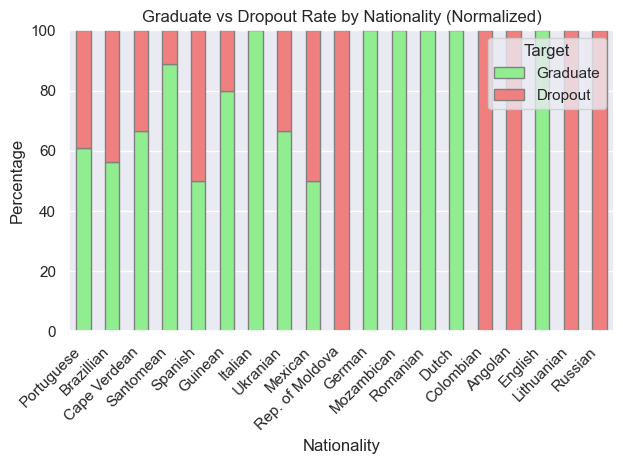

In [31]:
#calculate the percentage of students in each category for each nationality
nationality_counts = df['Nationality'].value_counts()
nationality_percentages = {}

#normalize data by count of students in each category for each nationality
for nationality in nationality_counts.index:
    nationality_df = df[df['Nationality'] == nationality]
    total_students = len(nationality_df)
    graduate_count = len(nationality_df[nationality_df['Target'] == 'Graduate'])
    dropout_count = len(nationality_df[nationality_df['Target'] == 'Dropout'])
    
    graduate_percentage = (graduate_count / total_students) * 100
    dropout_percentage = (dropout_count / total_students) * 100
    
    nationality_percentages[nationality] = {'Graduate': graduate_percentage, 'Dropout': dropout_percentage}

#create a dataframe for plotting
plot_df = pd.DataFrame(nationality_percentages).transpose()

#create the bar plot
plt.figure(figsize=(12, 6))
plot_df.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], edgecolor='gray')
plt.title('Graduate vs Dropout Rate by Nationality (Normalized)')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to ensure correct scaling
plt.xticks(rotation=45, ha='right')
plt.legend(title='Target', loc='upper right')
plt.tight_layout()
plt.show()

-inflation rate, gdp, and unemployment rate vs dropout vs graduate

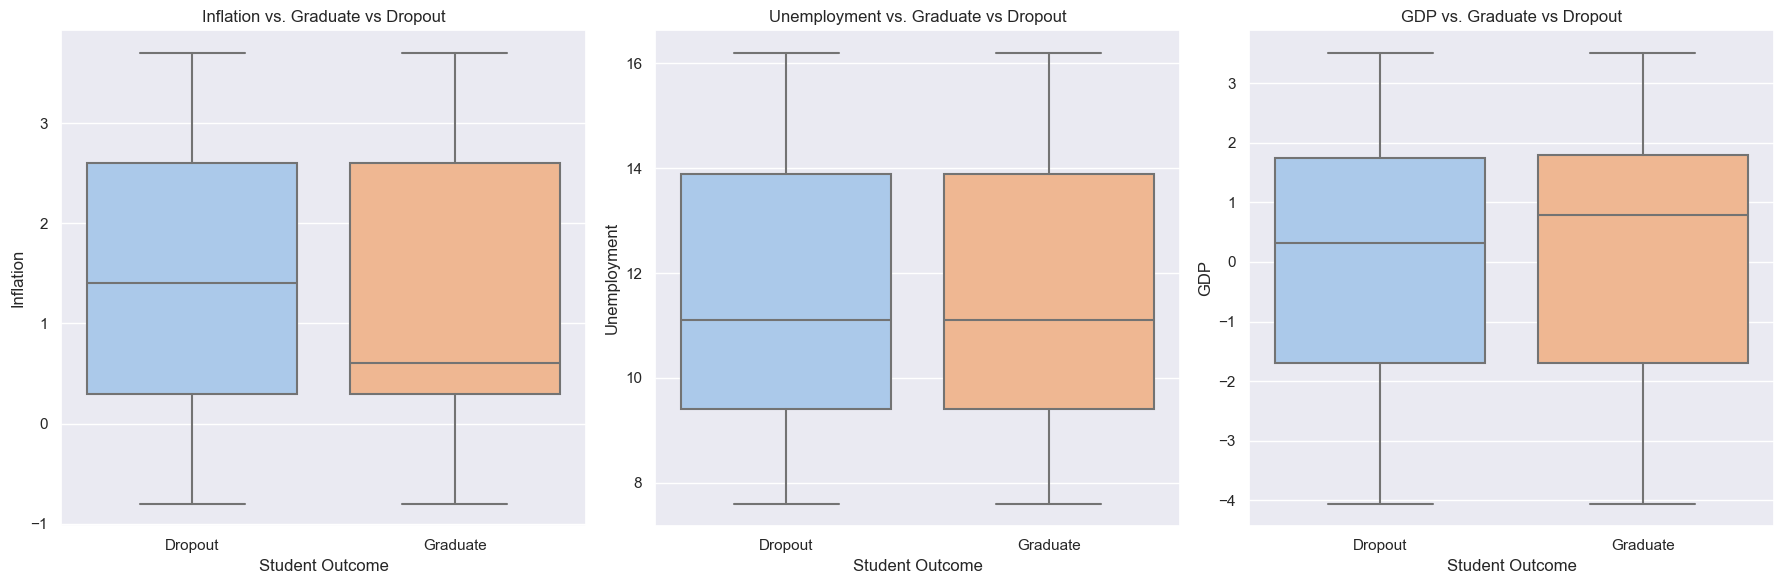

In [32]:
#set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

#create boxplot of Inflation Rate
sb.boxplot(x='Target', y='Inflation rate', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Inflation vs. Graduate vs Dropout')
axes[0].set_xlabel('Student Outcome')
axes[0].set_ylabel('Inflation')

#create boxplot of Inflation Rate
sb.boxplot(x='Target', y='Unemployment rate', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Unemployment vs. Graduate vs Dropout')
axes[1].set_xlabel('Student Outcome')
axes[1].set_ylabel('Unemployment')

#create boxplot of Inflation Rate
sb.boxplot(x='Target', y='GDP', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('GDP vs. Graduate vs Dropout')
axes[2].set_xlabel('Student Outcome')
axes[2].set_ylabel('GDP')

#show the plot
plt.tight_layout()
plt.show()

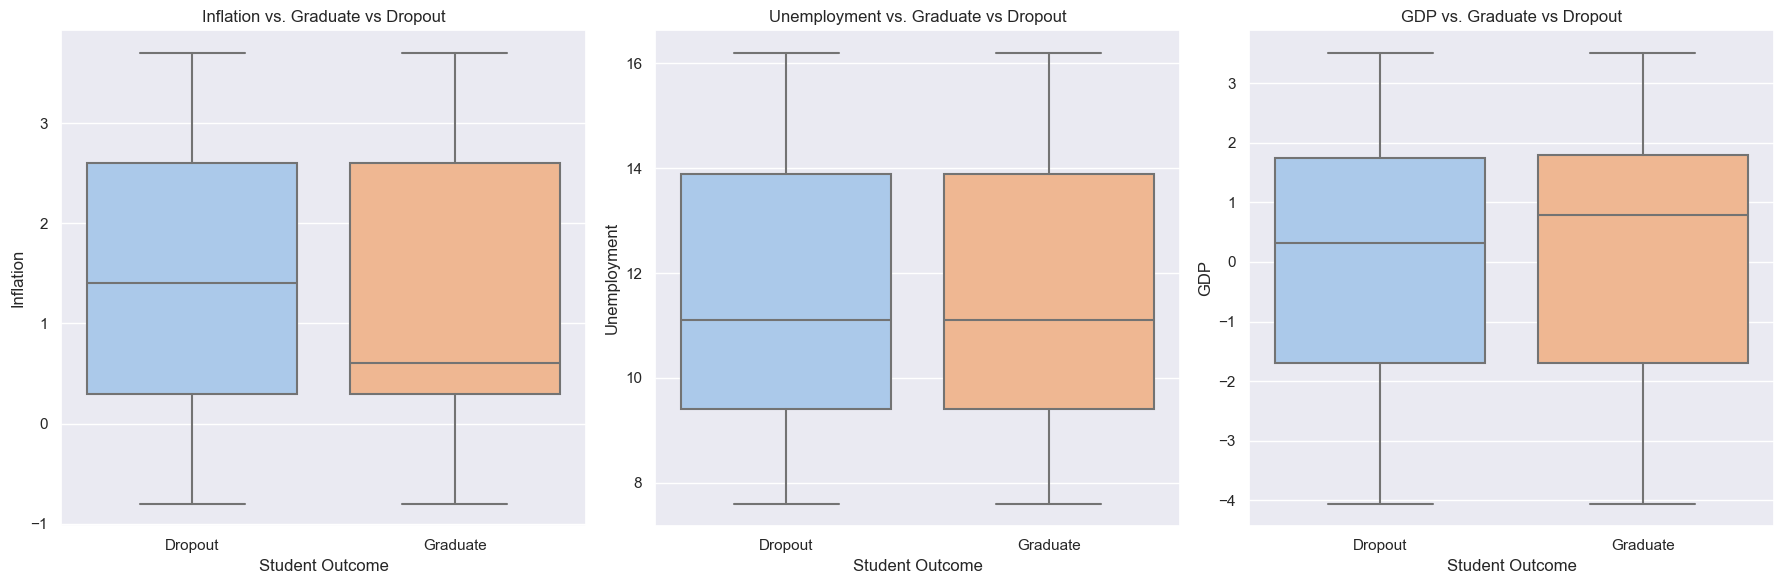

In [33]:
#set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

#create boxplot of Inflation Rate
sb.boxplot(x='Target', y='Inflation rate', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Inflation vs. Graduate vs Dropout')
axes[0].set_xlabel('Student Outcome')
axes[0].set_ylabel('Inflation')

#create boxplot of Inflation Rate
sb.boxplot(x='Target', y='Unemployment rate', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Unemployment vs. Graduate vs Dropout')
axes[1].set_xlabel('Student Outcome')
axes[1].set_ylabel('Unemployment')

#create boxplot of Inflation Rate
sb.boxplot(x='Target', y='GDP', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('GDP vs. Graduate vs Dropout')
axes[2].set_xlabel('Student Outcome')
axes[2].set_ylabel('GDP')

#show the plot
plt.tight_layout()
plt.show()

<h1>Financial Factors<h1>

This first graph shows the number of students that are debtors, have their tuition fees up to date, and are scholarship holders. This information lets us see how many students are in financial need. 

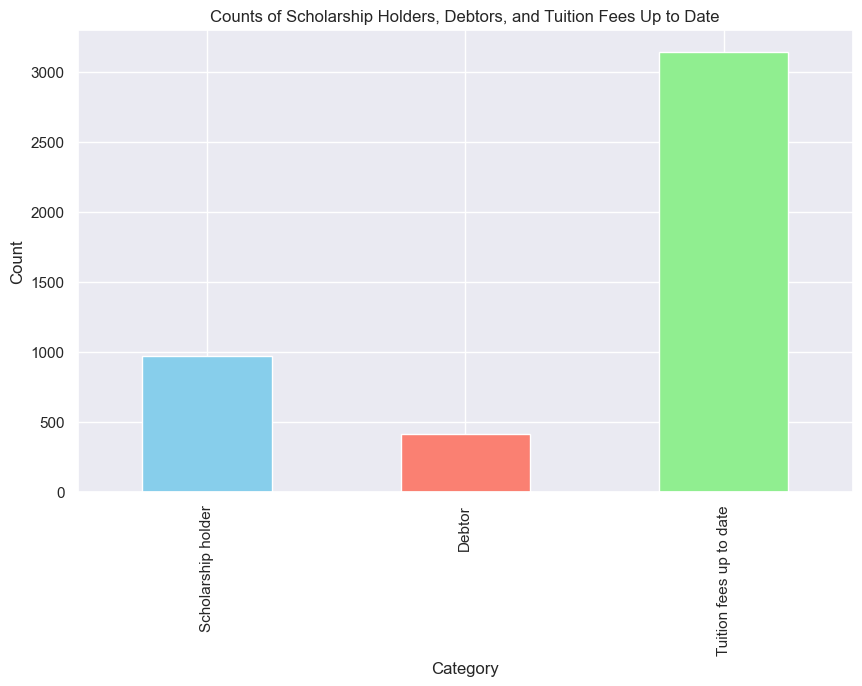

In [34]:
#make bar chart for debtors, scholarship holders, etc
# Filter the DataFrame to include only relevant columns
relevant_data = df[['Scholarship holder', 'Debtor', 'Tuition fees up to date']]

#count the occurrences of each category
counts = relevant_data.sum()

#plotting
counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], figsize=(10, 6))

#adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Scholarship Holders, Debtors, and Tuition Fees Up to Date')

#show plot
plt.show()

This chart shows the amount of graduates among scholarship holders, debters, and students whose tuition fees are up to date. It shows that debtors have the highest dropout rate among the three categories. 

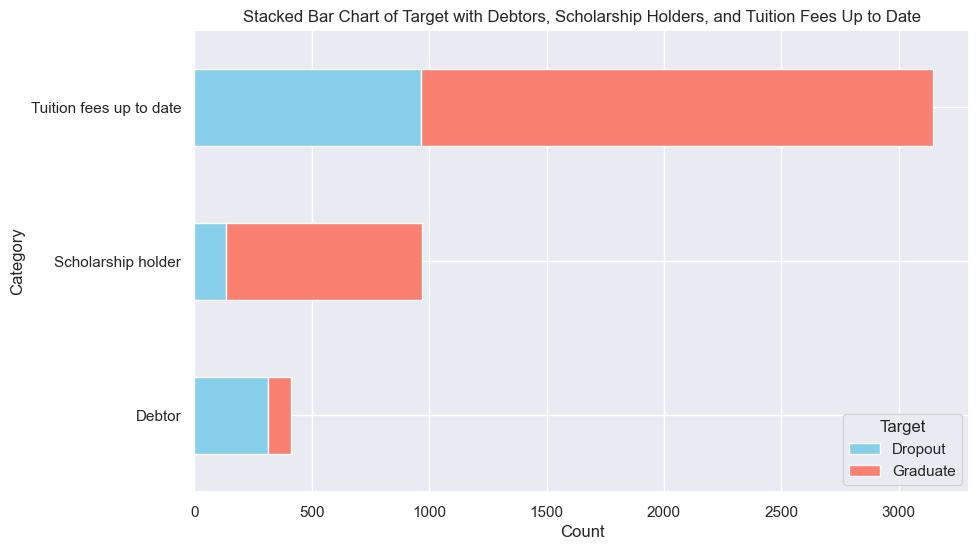

In [35]:
#filter the dataframe to include only relevant columns
relevant_data = df[['Target', 'Debtor', 'Scholarship holder', 'Tuition fees up to date']]

#group by Target and sum occurrences of each category
grouped_data = relevant_data.groupby('Target').sum()

#transpose the dataframe for easier plotting
grouped_data = grouped_data.T

#plotting the chart
grouped_data.plot(kind='barh', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen'])

#adding labels and title
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Stacked Bar Chart of Target with Debtors, Scholarship Holders, and Tuition Fees Up to Date')

#show plot
plt.show()